<a href="https://colab.research.google.com/github/HerculesVirus/Natural-Language-Processing/blob/master/Working_code/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practise Purpose


#KMean Clustering

In [ ]:
Dummy = ['milk bread bread bread',
       'bread milk milk bread',
       'milk milk milk bread bread bread bread',
       'cat cat cat dog dog bark',
       'dog dog cat bark mew mew',
       'cat dog cat dog mew']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
matrix_input = vec.fit_transform(Dummy)

In [ ]:
matrix_input

<6x6 sparse matrix of type '<class 'numpy.float64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km  = KMeans(n_clusters= 2)

In [ ]:
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(matrix_input[:-1])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.labels_

array([0, 0, 0, 1, 1], dtype=int32)

In [ ]:
km.predict(matrix_input[-1:])

array([1], dtype=int32)

#Nearest Neigbhors Clustering

In [ ]:
Dummy = ['milk bread bread bread',
       'bread milk milk bread',
       'milk milk milk bread bread bread bread',
       'cat cat cat dog dog bark',
       'dog dog cat bark new new',
       'cat dog cat dog new']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
matrix_x = vec.fit_transform(Dummy)

In [ ]:
from sklearn.neighbors import NearestNeighbors
nnc = NearestNeighbors()
nnc

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nnc.fit(matrix_x)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
nnc.kneighbors(matrix_x[0],3)

(array([[0.        , 0.32036449, 0.45950584]]), array([[0, 2, 1]]))

In [ ]:
nnc.radius_neighbors(matrix_x[0], radius=1.0)

(array([array([0.        , 0.45950584, 0.32036449])], dtype=object),
 array([array([0, 1, 2])], dtype=object))

#Hierarchical Clustering 




#Agglomerative Clustering

In [ ]:
Dummy = ['milk bread bread bread : grocery',
       'bread milk milk bread : grocery',
       'milk milk milk bread bread bread bread : grocery',
       'cat cat cat dog dog bark : pets',
       'dog dog cat bark new new : pets',
       'cat dog cat dog new cat : pets']

In [ ]:
X , y = [] , []
for doc in Dummy:
  i, l = doc.split(':')
  X.append(i.strip())
  y.append(l.strip())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer()

In [ ]:
matrix_X = vec.fit_transform(X)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
aggClus = AgglomerativeClustering(n_clusters= 3)

In [ ]:
aggClus.fit(matrix_X.toarray())

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [ ]:
aggClus.labels_

array([0, 0, 0, 1, 2, 1])

In [ ]:
#Cluster Parameter settings
#That Cell is Important and I work on later in it.

In [ ]:
#Knee or Elbow  finding
import numpy as np
docs = np.array([[1,1]  ,[1,3]  ,[2,4]  ,[3,1]  ,[5,3],
                 [11,10],[15,12],[12,21],[14,10],[11,13],
                 [20,22],[23,21],[24,20],[21,23],[24,25]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km1 = KMeans(n_clusters=1)
km2 = KMeans(n_clusters=2)
km3 = KMeans(n_clusters=3)
km4 = KMeans(n_clusters=4)

km1.fit(docs)
km2.fit(docs)
km3.fit(docs)
km4.fit(docs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km1.interia_ 

AttributeError: ignored

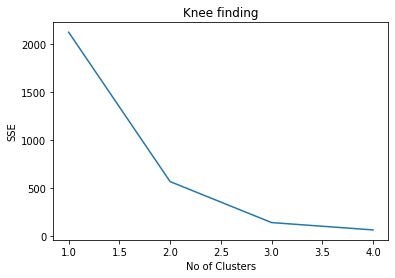

In [ ]:
from matplotlib import pyplot as plt 
plt.figure()
plt.plot([1,2,3,4],[km1.inertia_ ,km2.inertia_ , km3.inertia_ , km4.inertia_])
plt.xlabel('No of Clusters')
plt.ylabel('SSE')
plt.title('Knee finding')
plt.show()

In [ ]:
import pandas as pd
corpus = pd.read_csv('/content/drive/MyDrive/8th Semester/NLP/Text Representation/Dataset/Dataset.csv',error_bad_lines =False,encoding = 'Latin-1',delimiter='\n')
raw_data = corpus.values
dataset = [raw_data[i][0] for i in range(0,len(raw_data))]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(max_features= 100)
matrix_input = vec.fit_transform(dataset)

In [ ]:
sse = {}
for i in range(1,11):
  km = KMeans(n_clusters =i)
  km.fit(matrix_input)
  sse[i] = km.inertia_



In [ ]:
sse

{1: 320.08202304829706,
 2: 301.44483057770964,
 3: 290.25570392414886,
 4: 282.02244931631174,
 5: 276.221188712419,
 6: 272.3192100119795,
 7: 267.68400445642976,
 8: 264.7906501325876,
 9: 262.07269829199697,
 10: 259.041424632266}

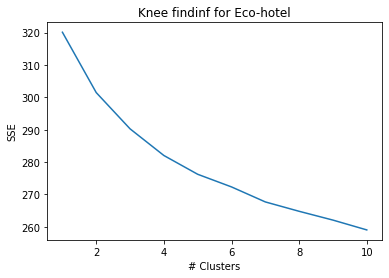

In [ ]:
plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel('# Clusters')
plt.ylabel('SSE')
plt.title('Knee findinf for Eco-hotel')
plt.show()

#Clustering PART-2

In [ ]:
corpus = open('/content/drive/MyDrive/8th Semester/NLP/Text Representation/Dataset/Dataset.csv', encoding= 'Latin-1').read()
docs = corpus.split('\n')

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
matrix_input = vec.fit_transform(docs)

from sklearn.neighbors import NearestNeighbors
nnc = NearestNeighbors(radius = 10.0)
nnc.fit(matrix_input)

dist, neighbors = nnc.kneighbors(matrix_input[0], 3)
print('neighbors', neighbors)
print('distances', dist)

print('neighbors', neighbors[0][1:])
print('distances', dist[0][1:])

dist, neighbors = nnc.radius_neighbors(matrix_input[3], radius = 3)
print('radius based neighbors: ', neighbors[1:])
print('radius based neighbors distances', dist[1:])

neighbors [[  0  28 124]]
distances [[0. 1. 1.]]
neighbors [ 28 124]
distances [1. 1.]
radius based neighbors:  []
radius based neighbors distances []


In [ ]:
import pandas as pd
import numpy as np

corpus = open('/content/drive/MyDrive/8th Semester/NLP/Validation and Evaluation/Dataset/__sentiDataset.txt', encoding = 'Latin-1').read()
docs = corpus.split('\n')
domain, label, rating, X = [], [], [], []
for d in docs:
    dm, lb, rt, inp = d.split('\t')
    domain.append(dm)
    label.append(lb)
    rating.append(int(rt))
    X.append(inp)

from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_features = 200, ngram_range = (1, 3))
matrix_X = vec.fit_transform(X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

model1 = KNeighborsClassifier(n_neighbors = 3)
model2 = KNeighborsClassifier(n_neighbors = 4, weights = 'distance')
model3 = MultinomialNB(alpha = 0.1, fit_prior = False)
model4 = DecisionTreeClassifier(max_depth = 3)
model5 = DecisionTreeClassifier(max_depth = 4)

from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)

from sklearn.metrics import precision_score, recall_score, f1_score

m1p, m1r, m1f = 0, 0, 0
m2p, m2r, m2f = 0, 0, 0
m3p, m3r, m3f = 0, 0, 0
m4p, m4r, m4f = 0, 0, 0 
m5p, m5r, m5f = 0, 0, 0

import numpy as np
rating = np.array(rating)

for train_ids, test_ids in kf.split(matrix_X):
    train_X, test_X = matrix_X[train_ids], matrix_X[test_ids]
    train_y, test_y = rating[train_ids], rating[test_ids]
    #training models
    model1.fit(train_X, train_y)
    model2.fit(train_X, train_y)
    model3.fit(train_X, train_y)
    model4.fit(train_X, train_y)
    model5.fit(train_X, train_y)
    #testing models
    py1 = model1.predict(test_X)
    py2 = model2.predict(test_X)
    py3 = model3.predict(test_X)
    py4 = model4.predict(test_X)
    py5 = model5.predict(test_X)
    #evaluate
    m1p += precision_score(test_y, py1, average = 'macro')
    m2p += precision_score(test_y, py2, average = 'macro')
    m3p += precision_score(test_y, py3, average = 'macro')
    m4p += precision_score(test_y, py4, average = 'macro')
    m5p += precision_score(test_y, py5, average = 'macro')
    
    m1r += recall_score(test_y, py1, average = 'macro')
    m2r += recall_score(test_y, py2, average = 'macro')
    m3r += recall_score(test_y, py3, average = 'macro')
    m4r += recall_score(test_y, py4, average = 'macro')
    m5r += recall_score(test_y, py5, average = 'macro')
    
    m1f += f1_score(test_y, py1, average = 'macro')
    m2f += f1_score(test_y, py2, average = 'macro')
    m3f += f1_score(test_y, py3, average = 'macro')
    m4f += f1_score(test_y, py4, average = 'macro')
    m5f += f1_score(test_y, py5, average = 'macro')

print('model 1... (5-fold cross validation)...')
print('precision score: ', m1p/5.0)
print('recall score: ', m1r/5.0)
print('f1 score: ', m1f/5.0)

print('model 2... (5-fold cross validation)...')
print('precision score: ', m2p/5.0)
print('recall score: ', m2r/5.0)
print('f1 score: ', m2f/5.0)

print('model 3... (5-fold cross validation)...')
print('precision score: ', m3p/5.0)
print('recall score: ', m3r/5.0)
print('f1 score: ', m3f/5.0)

print('model 4... (5-fold cross validation)...')
print('precision score: ', m4p/5.0)
print('recall score: ', m4r/5.0)
print('f1 score: ', m4f/5.0)

print('model 5... (5-fold cross validation)...')
print('precision score: ', m5p/5.0)
print('recall score: ', m5r/5.0)
print('f1 score: ', m5f/5.0)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

model 1... (5-fold cross validation)...
precision score:  0.25118962441574777
recall score:  0.2603631570434283
f1 score:  0.24981247525532374
model 2... (5-fold cross validation)...
precision score:  0.2574058180319314
recall score:  0.2445597949377259
f1 score:  0.2446432356033502
model 3... (5-fold cross validation)...
precision score:  0.3270538707866359
recall score:  0.34991039046488037
f1 score:  0.3192550734966029
model 4... (5-fold cross validation)...
precision score:  0.11055
recall score:  0.2
f1 score:  0.1423450021324904
model 5... (5-fold cross validation)...
precision score:  0.11552356020695717
recall score:  0.19990043928190518
f1 score:  0.1423839907140509


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
